In [ ]:
import cv2
import os
import imutils
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
#creamos una carpeta con el nombre de la persona de la que almacenaremos en la abse de datos
personName = 'Nikoll'
dataPath = 'C:\data'
personPath = dataPath + '/' + personName
#print(personPath)
if not os.path.exists(personPath):
  print('Çarpeta creada: ',personPath)
  os.makedirs(personPath)

Çarpeta creada:  C:\data/Nikoll


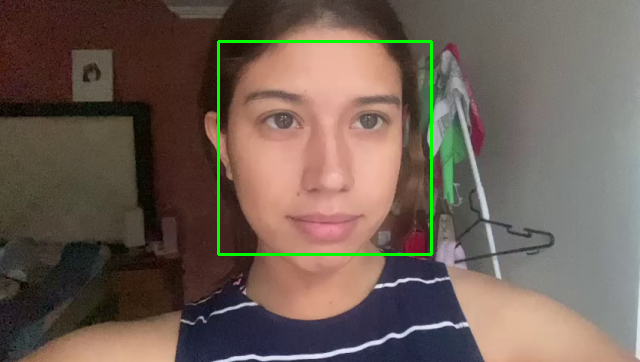

In [ ]:
#creacion de base de datos
#subimos un video de prueba para que captura 300 imagenes en la base de datos
cap = cv2.VideoCapture('nikoll.mp4')
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
count = 0

while True:
  ret , frame = cap.read()
  if ret == False:
    break
  frame = imutils.resize(frame, width=640)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = frame.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for(x, y, w, h)in faces:
    cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    rostro = auxFrame[y:y+h, x:x+w]
    rostro = cv2.resize(rostro, (720,720),interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(personPath+'/rostro_{}.jpg'.format(count),rostro)
    count = count + 1

  cv2_imshow(frame)

  k= cv2.waitKey(1)
  if k==27 or count >=300:
    break

  cap.release()
  cv2.destroyAllWindows()



Lista e personas:  ['Nikoll']
Leyendo las imagenes
Rostros:  Nikoll/rostro_0.jpg


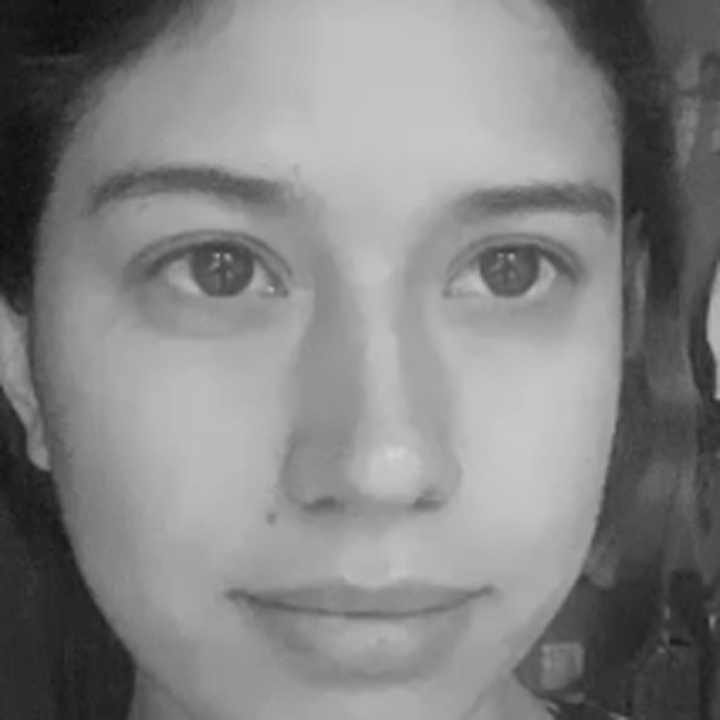

In [ ]:
#entrenamiento
dataPath = 'C:\data'
peopleList = os.listdir(dataPath)
print('Lista e personas: ',peopleList)

labels =  []
faceData = []
label = 0

for nameDir in peopleList:
  personPath = dataPath + '/' + nameDir
  print('Leyendo las imagenes')

  for fileName in os.listdir(personPath):
    print('Rostros: ',nameDir + '/' + fileName)
    #almacenar rostros y etiqyetas
    labels.append(labels)
    faceData.append(cv2.imread(personPath+'/'+fileName,0))
    image = cv2.imread(personPath+'/'+fileName,0)
    cv2_imshow(image)
  #incrementar el contador label para que de un inicio asigne el valor 0 en la primera carpeta que lea y sucesivbamente
  label = label + 1

cv2.destroyAllWindows()

In [ ]:
#primer metod de entrenamiento face recognizer
#entrenando el reconocedor de rostros

face_recognizer = cv2.face.EigenFaceRecognizer_create()
print("entrenando...")
face_recognizer.train(faceData, np.array(label))
#almacenando el modelo obtenido
face_recognizer.write('modeloEigenFace.xml')
print("Modelo almacenado")

entrenando...
Modelo almacenado


imagePaths= ['Nikoll']


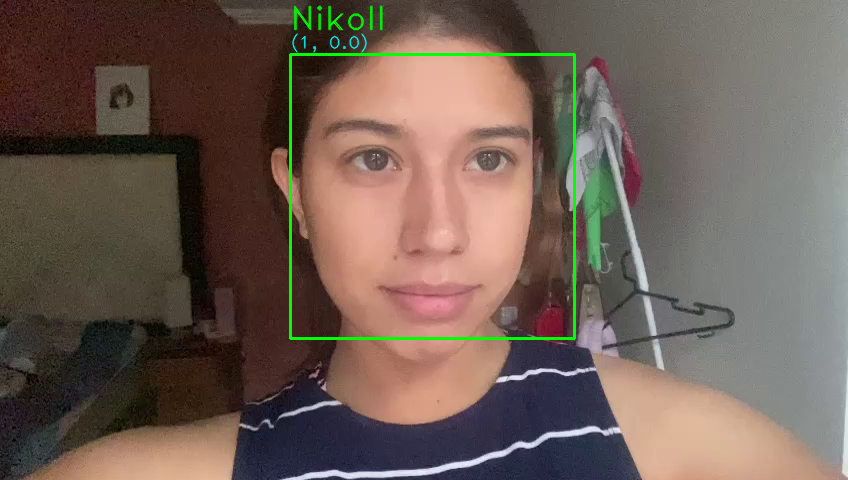

In [ ]:
#probando el funcionamiento del conocedor de rostros
dataPath = 'C:\data'
imagePaths = os.listdir(dataPath)
print('imagePaths=',imagePaths)

face_recognizer.read('modeloEigenFace.xml')
cap = cv2.VideoCapture('nikoll.mp4')
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
  ret , frame = cap.read()
  if ret == False:
    break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray, 1.3, 5)

  for(x, y, w, h)in faces:
    rostro = auxFrame[y:y+h, x:x+w]
    rostro = cv2.resize(rostro, (720,720),interpolation = cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame,'{}'.format(result),(x,y-5),1,1.3,(255,255,0),1,cv2.LINE_AA)
    # EigenFaces
    if result[1] < 5700:
      cv2.putText(frame,'{}'.format(imagePaths[0]),(x,y-25),2,1.1,(0,255,0),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    else:
      cv2.putText(frame,'desconocido',(x,y-20),2,0.8,(0,0,255),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)

  cv2_imshow(frame)

  k= cv2.waitKey(1)
  if k==27:
    break

  cap.release()
  cv2.destroyAllWindows()
